In [136]:
import pandas as pd
import tweepy       # python wrapper for twitter api
import json
import time
import requests
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# step 0, get your own twitter credentials!

In [137]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = 'NAw1wegVEZueRDqyA27c0pjjT'
api_secret = '0IbLwj3CPnsMs6xDPrRtjLDPvLAuYT1US6bgM5pvSlRemIFwrl'
access_token = '3278767399-BzpJJJxsA64HQqxPHRrjIaoNaPrz0mxfsOnl2Qu'
access_secret = 'Q2B7TbCNkZUTEsXfmFtpx9GlnMk3SimvW7WKmJC2waV0o'

In [138]:
# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object

In [139]:
# 1. Use Twitter API to stream and store tweets (300 per candidate)
# 37.781157,-122.39872 is the lat,lng for SF
hillary_tweets = api.search(q='#ImWithHer', count=100, geocode="37.781157,-122.398720,10mi") + api.search(q='#hillaryclinton', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#hillary2016', count=100, geocode="37.781157,-122.398720,50mi")
the_donald_tweets = api.search(q='#donaldtrump', count=100, geocode="37.781157,-122.398720,10mi") + api.search(q='#trump2016', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#trump', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#makeamericagreatagain', count=100, geocode="37.781157,-122.398720,50mi")

In [140]:
the_donald_tweets[0].text

u'Has #MikePence been in a coma the last 15 months? How does he not know about the outrageous crap #DonaldTrump has been saying? #VPDebate'

In [141]:
hillary_tweets[0].text

u'Pence thinks climate change &amp; evolution are hoaxes, but is pro-gay conversion therapy. And I thought Trump was scary. #ImWithTim #ImWithHer'

In [142]:
# wrappers come with built in python attributes and methods!
print dir(the_donald_tweets[0])

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [143]:
print the_donald_tweets[0].created_at
print the_donald_tweets[0].text
print the_donald_tweets[0].favorite_count
print the_donald_tweets[0].favorited
print the_donald_tweets[0].lang
print the_donald_tweets[0].geo
print the_donald_tweets[0].retweet_count
print the_donald_tweets[0].retweeted
print the_donald_tweets[0].coordinates

2016-10-05 02:58:03
Has #MikePence been in a coma the last 15 months? How does he not know about the outrageous crap #DonaldTrump has been saying? #VPDebate
2
False
en
None
0
False
None


In [144]:
# modify the tweets to make a nice dictionary
def parse_status_objects(tweet_list):
    modified_tweets = list()
    for x in tweet_list:
        modified_tweets.append( [
                    x.created_at,
                    x.text,
                    x.favorite_count,
                    x.favorited,
                    x.lang,
                    x.geo,
                    x.retweet_count,
                    x.retweeted,
                    x.coordinates
                ])
    return modified_tweets
        
hillary_tweets = parse_status_objects(hillary_tweets)
the_donald_tweets = parse_status_objects(the_donald_tweets)

In [145]:
print the_donald_tweets[0]
print hillary_tweets[0]

[datetime.datetime(2016, 10, 5, 2, 58, 3), u'Has #MikePence been in a coma the last 15 months? How does he not know about the outrageous crap #DonaldTrump has been saying? #VPDebate', 2, False, u'en', None, 0, False, None]
[datetime.datetime(2016, 10, 5, 4, 13, 30), u'Pence thinks climate change &amp; evolution are hoaxes, but is pro-gay conversion therapy. And I thought Trump was scary. #ImWithTim #ImWithHer', 0, False, u'en', None, 0, False, None]


In [146]:
# 2 Create a dataframe that combines all of the tweets from each candidate
# To do so, you will need to concat the data frames
# so each row is a tweet and your columns should be 
# date, text, favorite_count,favorited, language, geocode, retweet count, retweeted, coordinates

In [147]:
donald_df = pd.DataFrame(the_donald_tweets)
donald_df.rename(columns={0:'date', 1:'text', 2:'favorite_count',
                         3:'favorited', 4:'language', 5:'geocode',
                         6:'retweet_count', 7: 'retweeted',
                         8:'coordinates' }, inplace=True)

In [148]:
hillary_df = pd.DataFrame(hillary_tweets)
hillary_df.rename(columns={0:'date', 1:'text', 2:'favorite_count',
                         3:'favorited', 4:'language', 5:'geocode',
                         6:'retweet_count', 7: 'retweeted',
                         8:'coordinates' }, inplace=True)

In [149]:
donald_df['democrat'] = 0
hillary_df['democrat'] = 1

In [150]:
all_tweets = pd.concat([hillary_df, donald_df])

In [151]:
all_tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,democrat
0,2016-10-05 04:13:30,Pence thinks climate change &amp; evolution ar...,0,False,en,None,0,False,None,1
1,2016-10-05 03:56:49,Thanks to all who attended Clinton-Kaine debat...,0,False,en,None,0,False,None,1
2,2016-10-05 03:49:39,RT @Corporatocrazy: Funny how all the black le...,0,False,en,None,790,False,None,1
3,2016-10-05 03:47:54,RT @loobah_l: I support @HillaryClinton. I als...,0,False,en,None,1,False,None,1
4,2016-10-05 03:44:58,"RT @kalcorn: Kaine: ""Truth truth truth.""\nPenc...",0,False,en,None,3,False,None,1


In [152]:
all_tweets.shape

(657, 10)

In [153]:
# 3 Create a function to take in a string and output the textblob sentiment of that string

In [154]:
from textblob import TextBlob, Word

def detect_sentiment(text):
    return round(TextBlob(text).sentiment.polarity,3)

In [155]:
detect_sentiment('this is not good')

-0.35

In [156]:
detect_sentiment('this is awesome')

1.0

In [157]:
# 4 Add a column to your data frame called 'sentiment'
# which holds the sentiment of that tweet (hint: use the function from #3)

In [158]:
all_tweets['sentiment'] = all_tweets.text.apply(detect_sentiment)

In [159]:
all_tweets

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,democrat,sentiment
0,2016-10-05 04:13:30,Pence thinks climate change &amp; evolution ar...,0,False,en,None,0,False,None,1,-0.500
1,2016-10-05 03:56:49,Thanks to all who attended Clinton-Kaine debat...,0,False,en,None,0,False,None,1,0.200
2,2016-10-05 03:49:39,RT @Corporatocrazy: Funny how all the black le...,0,False,en,None,790,False,None,1,0.042
3,2016-10-05 03:47:54,RT @loobah_l: I support @HillaryClinton. I als...,0,False,en,None,1,False,None,1,0.100
4,2016-10-05 03:44:58,"RT @kalcorn: Kaine: ""Truth truth truth.""\nPenc...",0,False,en,None,3,False,None,1,0.000
5,2016-10-05 03:44:17,That's an understatement #VPDebate #ImWithHer ...,1,False,en,None,0,False,None,1,0.000
6,2016-10-05 03:42:49,Figured I should capitalize with all this swag...,0,False,en,None,0,False,None,1,0.000
7,2016-10-05 03:39:31,I support @HillaryClinton. I also take selfies...,2,False,en,None,1,False,None,1,0.100
8,2016-10-05 03:35:26,RT @JenGranholm: Hated the Wall Street bailout...,0,False,en,None,51,False,None,1,-0.900
9,2016-10-05 03:30:53,.@HillaryClinton may have had pneumonia but @r...,0,False,en,None,0,False,None,1,0.600


In [160]:
all_tweets.text[6]

6    Figured I should capitalize with all this swag...
6    #MikePence and #DonaldTrump will build a wall ...
Name: text, dtype: object

In [161]:
# 5 create a word count column, which holds the number of words in the text column

In [162]:
def word_count_in_text(text):
    return len(text.split())

In [163]:
word_count_in_text('hello how you')

3

In [164]:
all_tweets['word_count'] = all_tweets.text.apply(word_count_in_text)

In [165]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 362
Data columns (total 12 columns):
date              657 non-null datetime64[ns]
text              657 non-null object
favorite_count    657 non-null int64
favorited         657 non-null bool
language          657 non-null object
geocode           4 non-null object
retweet_count     657 non-null int64
retweeted         657 non-null bool
coordinates       4 non-null object
democrat          657 non-null int64
sentiment         657 non-null float64
word_count        657 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 57.7+ KB


In [166]:
# use countvectorizer to create a document-term matrix and concatinate it to your main dataframe
#(hint you should now have thousands of columns)
# Don't add count vectorizer result to the original dataframe

In [167]:
vect = CountVectorizer()
words_tweets = pd.DataFrame(vect.fit_transform(all_tweets.text).toarray(), columns=vect.get_feature_names())

In [168]:
words_tweets.shape

(657, 2561)

In [169]:
words_tweets.head()

,000,00am,00pm,01ht1akt4f,02,04am,0bgeposlod,0nzbprev7f,10,100,...,yzjnna3hyj,zaikui8oj1,zeldawilliams,zie2y6m6dk,zinger,zone,zones,ztg18mba6e,ztrn891uxr,zxjs7nlnsy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
all_tweets.shape

(657, 12)

In [246]:
combined = all_tweets.drop(['date','text','language','geocode','coordinates'],axis=1)

In [247]:
combined = pd.merge(combined,words_tweets, right_index=True, left_index=True)

In [248]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 362
Columns: 2568 entries, favorite_count to zxjs7nlnsy
dtypes: bool(2), float64(1), int64(2565)
memory usage: 12.9 MB


In [249]:
combined.head()

,favorite_count,favorited,retweet_count,retweeted_x,democrat,sentiment,word_count,000,00am,00pm,...,yzjnna3hyj,zaikui8oj1,zeldawilliams,zie2y6m6dk,zinger,zone,zones,ztg18mba6e,ztrn891uxr,zxjs7nlnsy
0,0,False,0,False,1,-0.500,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,2,False,0,False,0,-0.475,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,False,0,False,1,0.200,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,False,0,False,0,0.300,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,False,790,False,1,0.042,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
# 6 Use kmean to create clusters for the dataframe (choose an optimal k)
# Don't add clusters to the original dataframe

In [176]:
from sklearn.cluster import KMeans

In [250]:
km = KMeans(n_clusters=3)
km.fit(combined)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [199]:
combined['cluster'] = km.labels_
combined.sort('cluster')

/Users/timf/anaconda/envs/datascience/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,favorite_count,favorited,retweet_count,retweeted_x,sentiment,word_count,000,00am,00pm,01ht1akt4f,...,zaikui8oj1,zeldawilliams,zie2y6m6dk,zinger,zone,zones,ztg18mba6e,ztrn891uxr,zxjs7nlnsy,cluster
0,0,False,0,False,-0.500,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,2,False,1,False,0.200,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,False,0,False,0.000,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,False,0,False,0.000,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,0,False,0,False,0.000,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,0,False,0,False,0.000,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,False,2,False,0.300,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,False,0,False,-0.042,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,0,False,0,False,0.000,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,1,False,1,False,0.600,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# 7 Explore the clusters
# What is interesting? Surprising? Can you draw any inferences about each cluster?
# Write your answer to these questions in markdown

In [200]:
combined.groupby('cluster').mean()

,favorite_count,favorited,retweet_count,retweeted_x,sentiment,word_count,000,00am,00pm,01ht1akt4f,...,yzjnna3hyj,zaikui8oj1,zeldawilliams,zie2y6m6dk,zinger,zone,zones,ztg18mba6e,ztrn891uxr,zxjs7nlnsy
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.531197,False,1.913997,False,0.058019,15.239460,0.001686,0.003373,0.003373,0.0,...,0.0,0.0,0.0,0.003373,0.003373,0.003373,0.003373,0.0,0.0,0.003373
1,0.000000,False,793.200000,False,0.008400,14.200000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,2.847458,False,37.050847,False,0.000373,20.745763,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [ ]:
# 8 Create a column called 'democrat' and assign it to the corresponding candidate name for all the records
# 1 for hilary and 0 for donald trump
# Make a boxplot of sentiment for each candidate by the "democrat" column

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

{'boxes': [<matplotlib.lines.Line2D at 0x120dc2ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x120dbdd50>,
 'fliers': [<matplotlib.lines.Line2D at 0x120dd7090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x120dc1a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x120dbd050>,
  <matplotlib.lines.Line2D at 0x120dbd710>]}

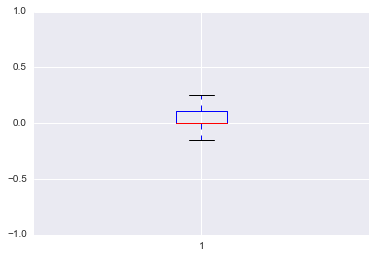

In [188]:
plt.boxplot(all_tweets[all_tweets.democrat == 0].sentiment)  #Trump

{'boxes': [<matplotlib.lines.Line2D at 0x120ccc590>],
 'caps': [<matplotlib.lines.Line2D at 0x120cd0410>,
 'fliers': [<matplotlib.lines.Line2D at 0x120afe710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x120afe0d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x120ccc6d0>,
  <matplotlib.lines.Line2D at 0x120cccd90>]}

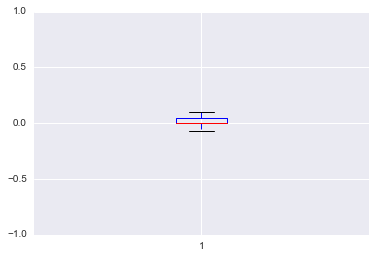

In [190]:
plt.boxplot(all_tweets[all_tweets.democrat == 1].sentiment) #Hillary

In [192]:
all_tweets[all_tweets.democrat == 0].sentiment.mean() #Trump

0.05645730027548209

In [193]:
all_tweets[all_tweets.democrat == 1].sentiment.mean() #Hillary

0.04753401360544216

In [ ]:
# 9 Estimate classification models using knn and logistic regession.  Dont forget to use cross validation 
    # (do not use cross_val_score because we will want a confusion matrix).
# The cateogrical response here is predict democrat or republican
# Your features can EITHER be your countvectorizer document term matrix OR 
# data from the original dataframe (sentiment, word count, etc)

In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [203]:
list(all_tweets.columns.values)

['date',
 'text',
 'favorite_count',
 'favorited',
 'language',
 'geocode',
 'retweet_count',
 'retweeted',
 'coordinates',
 'democrat',
 'sentiment',
 'word_count']

In [251]:
combined.head()

,favorite_count,favorited,retweet_count,retweeted_x,democrat,sentiment,word_count,000,00am,00pm,...,yzjnna3hyj,zaikui8oj1,zeldawilliams,zie2y6m6dk,zinger,zone,zones,ztg18mba6e,ztrn891uxr,zxjs7nlnsy
0,0,False,0,False,1,-0.500,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,2,False,0,False,0,-0.475,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,False,0,False,1,0.200,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,False,0,False,0,0.300,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,False,790,False,1,0.042,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [252]:
y = combined.democrat
X = combined.drop('democrat',axis=1)

In [255]:
features_train, features_test, response_train, response_test \
= train_test_split(X, y, random_state=1)

In [295]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(features_train, response_train)
knn.score(features_test, response_test)

0.68484848484848482

In [303]:
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores.mean()

0.58700884357372907

In [282]:
#% that are Trump --- Null hypothsesis
combined.democrat[combined.democrat == 0].count()/float(combined.democrat.count())

0.55251141552511418

In [ ]:
# Logistic Regression

In [283]:
from sklearn.linear_model import LogisticRegression

In [297]:
logreg = LogisticRegression()
logreg.fit(features_train, response_train)
logreg.score(features_test, response_test)

0.19393939393939394

In [300]:
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
scores.mean()

0.30276108115802775

In [ ]:
# 10 Initialize a classification model (for both knn and logistic)
# This is separate from step 9 because I will eventually want a 
# confusion matrix and we can't do that via cros validation

In [ ]:
# 11 Split your data into training and testing tests and then
# train your classification model  (for both knn and logistic)

In [ ]:
# 12 Predict on your test features and targets (for both knn and logistic)

In [ ]:
# 13 output your accuracy (for both knn and logistic)

In [ ]:
# 14 Create a confusion matrix for your predictions (for both knn and logistic)
# What is the sensitivity and specificity?

In [ ]:
# 15 Who is the easiest candidate to predict? Why do you think? 
# Who is the hardest? Why do you think?
# Write your answers in markdown (for both knn and logistic)

In [ ]:
# 16 BONUS: make a pipeline with the first step being a feature union of countvectorizer
# and tfidfvectorizer and no other features and our second step is
# a ML model (your choice) predict our binary response


In [16]:
# 17: BONUS: grid search the model in step 16 to obtain the best features (up to you)

In [ ]:
# 18: SUPER BONUS: make a custom transformer that extracts sentiment and word count
# make a pipeline that combines countvec, tfidfvec and your custom transformer
# and try to get the possible accuracy for predicting whether or not the person is talking
# about democrats or republicans